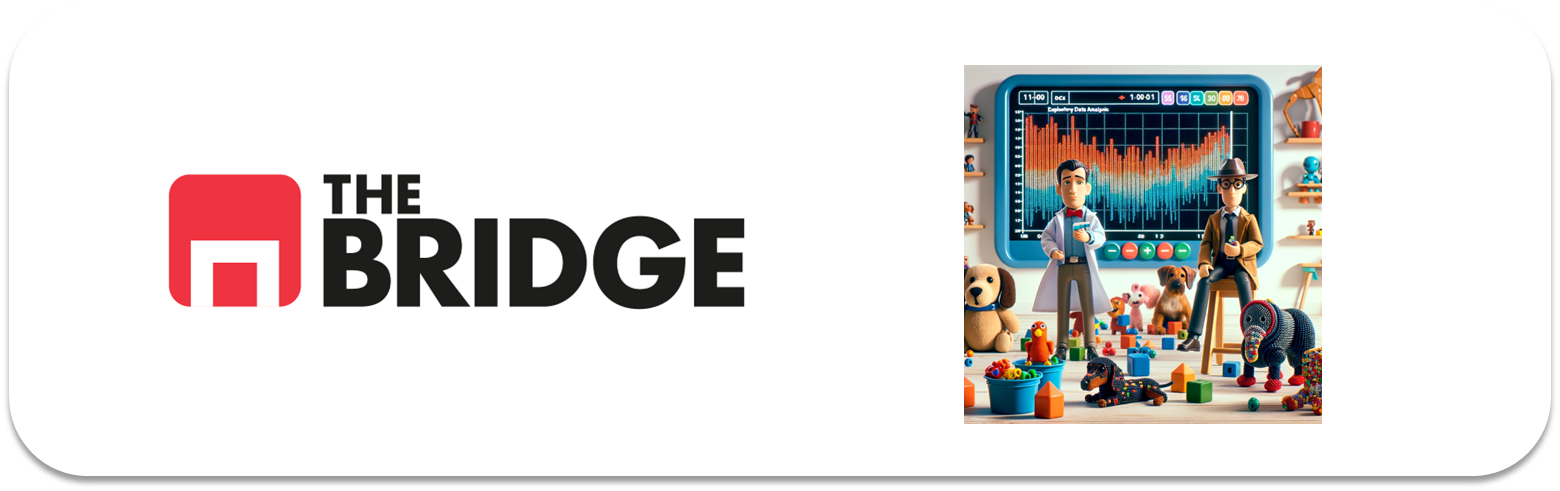

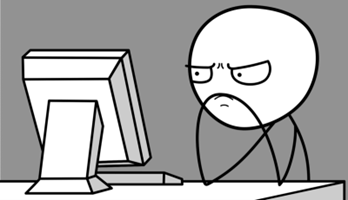

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
from bootcampviztools import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admission = pd.read_csv("./data/admission_data.csv", index_col=0)
df_admission = df_admission.drop("Year", axis = 1)
df_admission

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,Department of Mechanical Engineering,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

#ANALISI MULTIVARIANTE CON ADMISSION COMO DIRECTORA

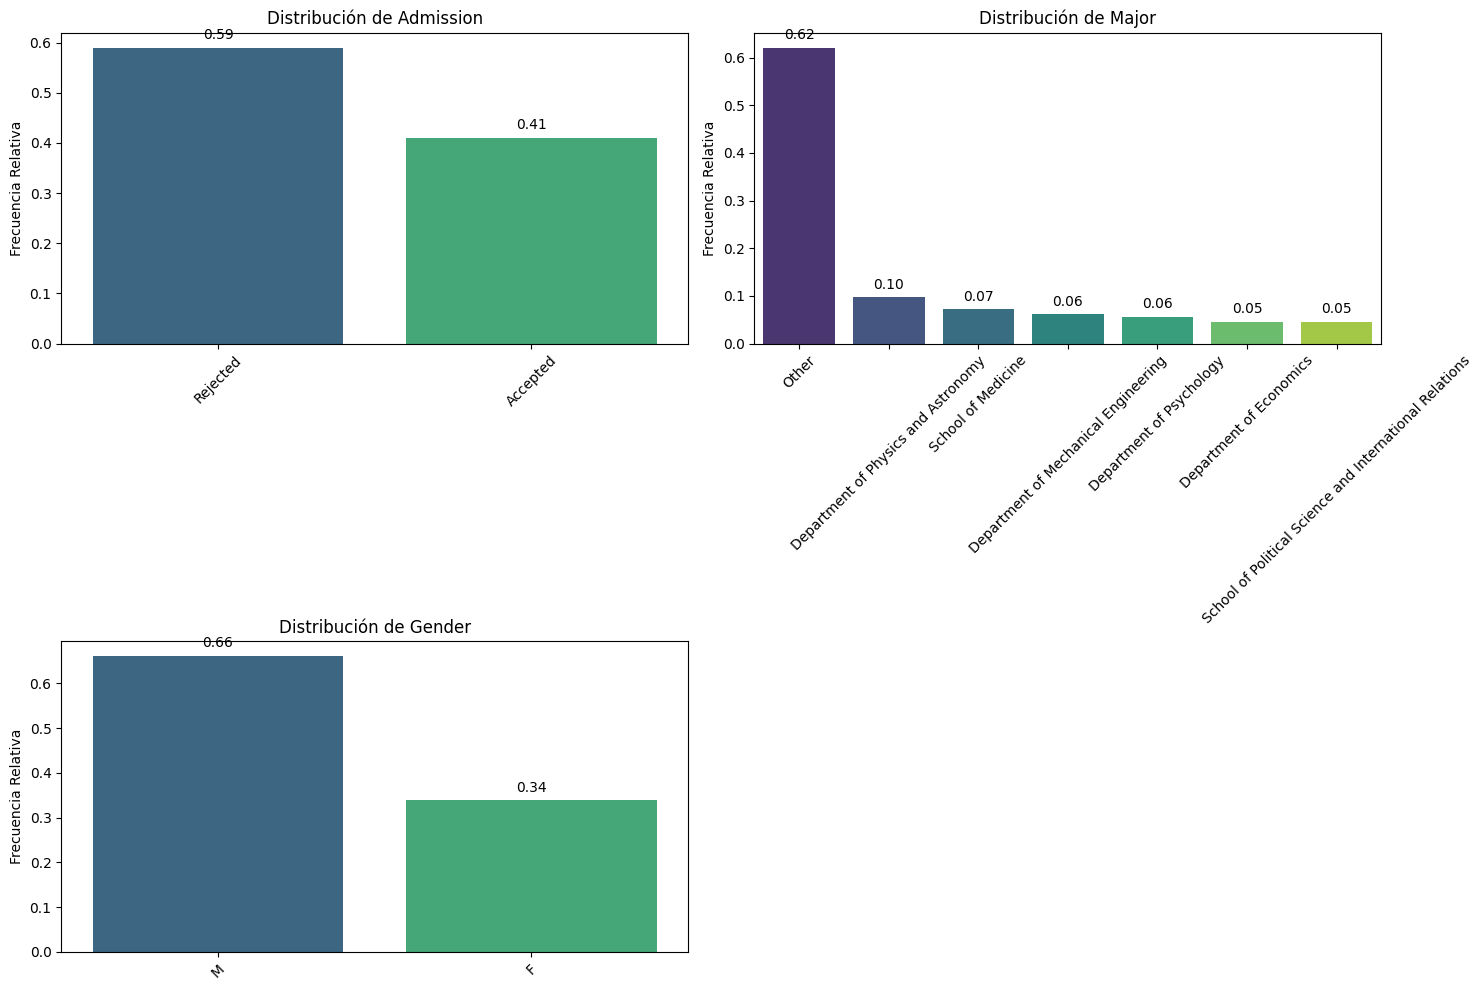

In [3]:
pinta_distribucion_categoricas(df_admission,["Admission","Major","Gender"], relativa= True, mostrar_valores= True)

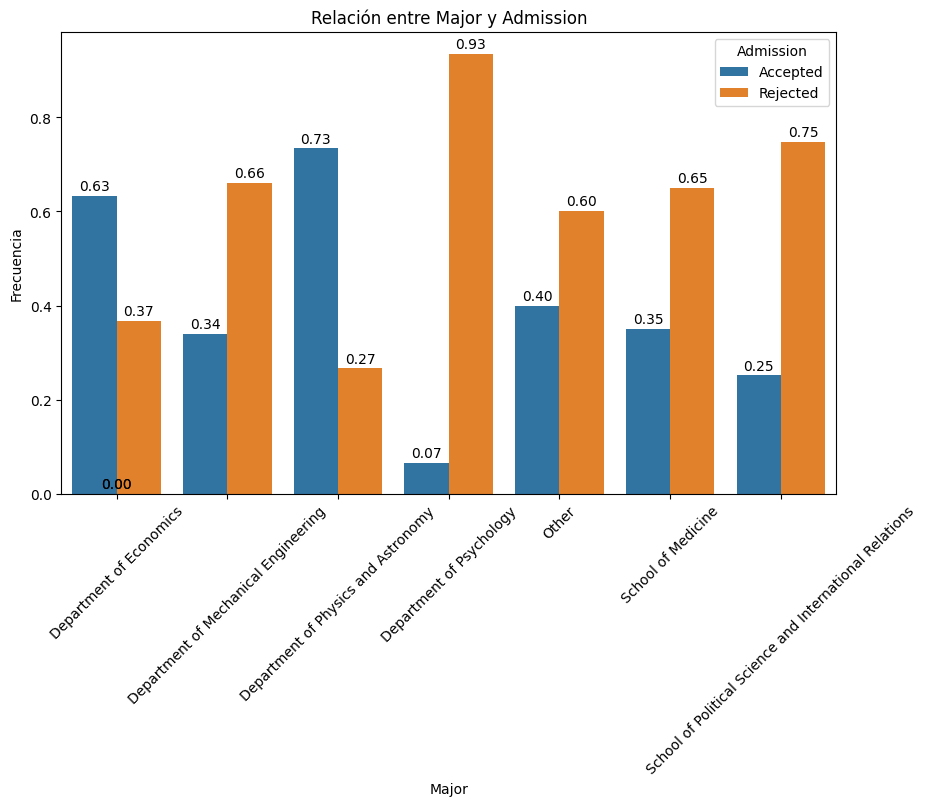

In [6]:
#Bivariante de cada una con las otras:
plot_categorical_relationship_fin(df_admission,"Major","Admission", relative_freq= True, show_values= True, size_group=7)

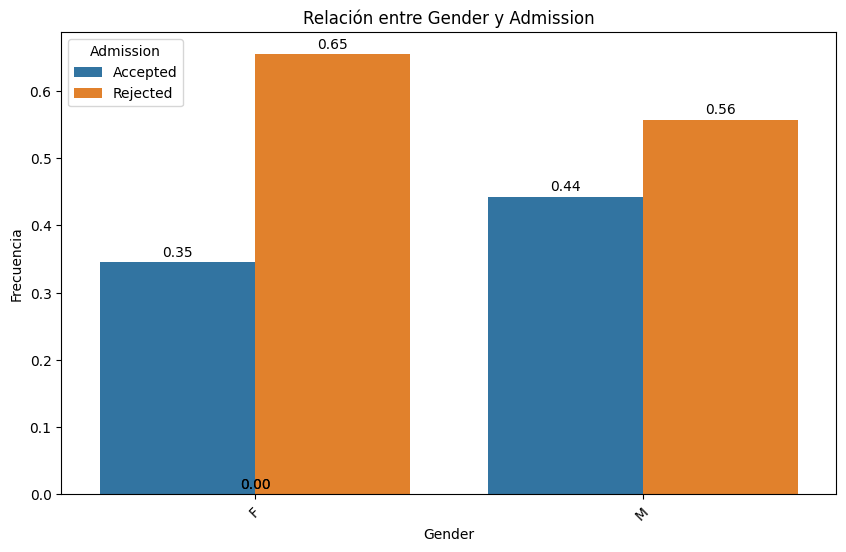

In [7]:
plot_categorical_relationship_fin(df_admission,"Gender","Admission", relative_freq= True, show_values= True, size_group=7)

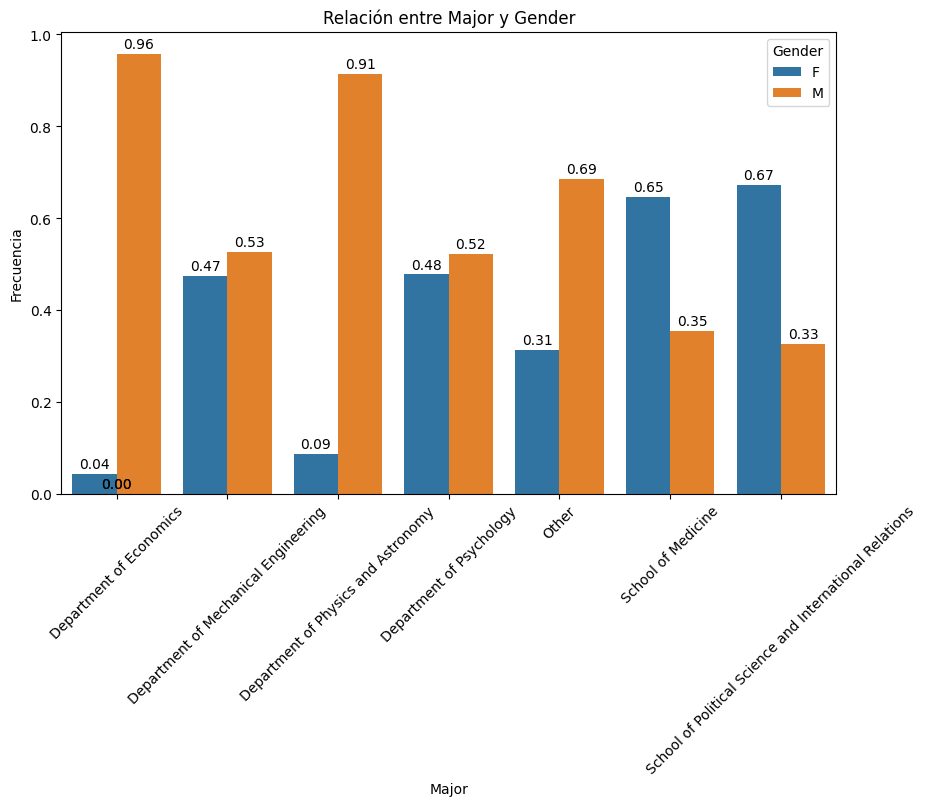

In [8]:
plot_categorical_relationship_fin(df_admission,"Major","Gender", relative_freq= True, show_values= True, size_group=7)

Divido mi dataset en tantos subdatasets (dataframes) como valores de mi categórica directora** y me quedo solo con las columnas de las otras dos variables

In [11]:
columnas = ["Admission","Gender","Major"] 
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]] 
    # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

diccionario_multivariante

# CON ESO SE HA CREADO UN DICCIONARIO con claves los valores categoricos de la var directora, en este caso Yes/No
# y con valores los valores de las otras dos variables que queremos comparar

{'Rejected':                     Major Gender
 0      School of Medicine      F
 4                   Other      M
 5                   Other      M
 8                   Other      M
 10                  Other      F
 ...                   ...    ...
 12755               Other      F
 12756               Other      M
 12757               Other      F
 12760               Other      F
 12761               Other      M
 
 [7531 rows x 2 columns],
 'Accepted':                                       Major Gender
 1                   Department of Economics      M
 2                                     Other      F
 3                                     Other      M
 6                  Department of Psychology      F
 7                                     Other      M
 ...                                     ...    ...
 12753                                 Other      M
 12754   Department of Physics and Astronomy      M
 12758                                 Other      M
 12759  Department o

Respuesta Rejected:


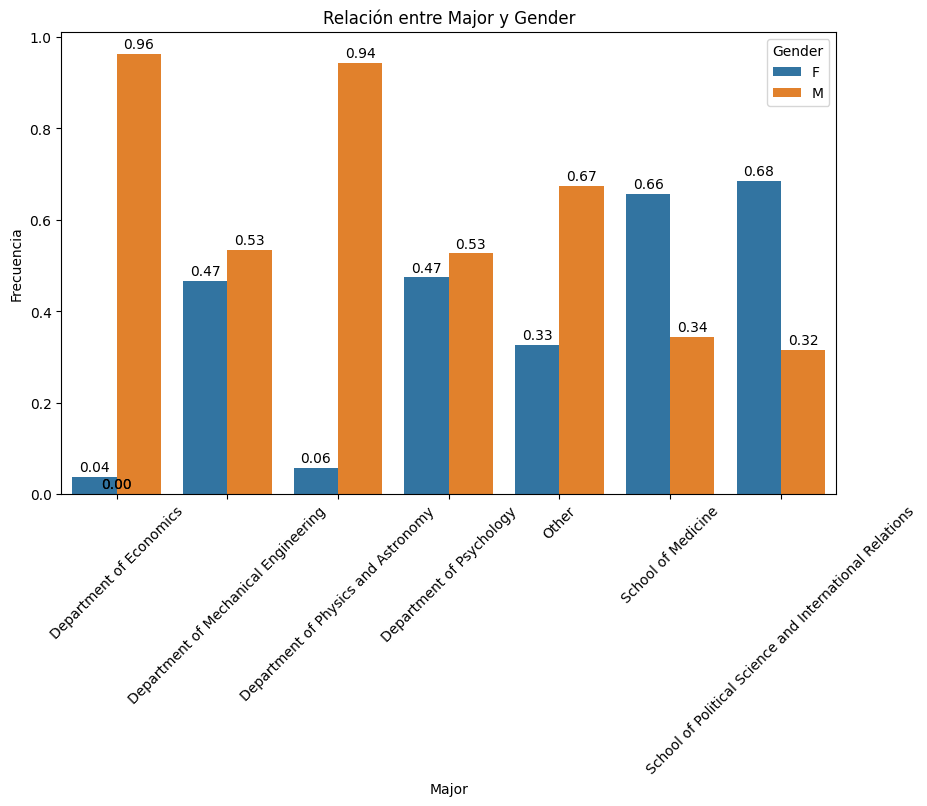

Respuesta Accepted:


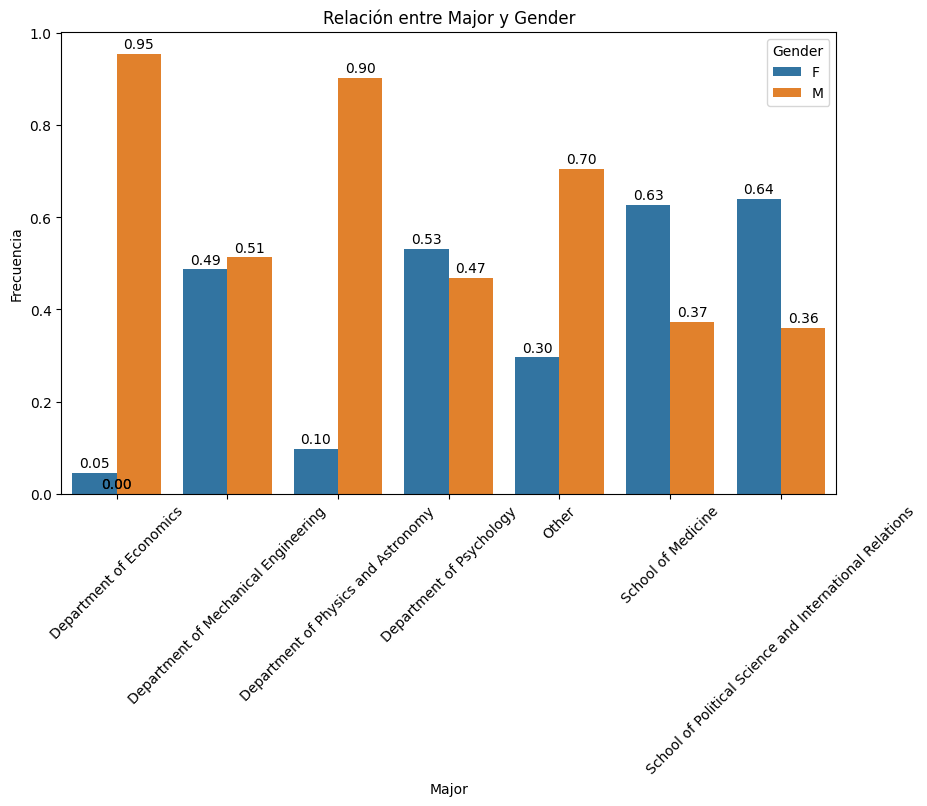

In [13]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=7)

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?